In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy


# the below extension properly formats a cell after it is run
%load_ext nb_black 

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)
import pandas as pd

# Set the maximum number of columns to 200
pd.set_option('display.max_columns', 200)




The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [86]:
housing = pd.read_csv("data/Ames_Housing_Price_Data.csv", index_col=0)
# real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv", index_col=0)
print(housing.shape)
# print(real_estate.shape)

(2580, 81)


<IPython.core.display.Javascript object>

In [87]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


<IPython.core.display.Javascript object>

In [88]:
housing.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PavedDrive', 'PoolArea', 'P

<IPython.core.display.Javascript object>

In [106]:
# Taking a look at the NA's.
null_stats = (
    housing.isnull()
    .sum()
    .pipe(lambda x: pd.DataFrame({"missing_value_count": x}))
    .assign(
        percent_of_dataset=lambda x: np.round(
            x["missing_value_count"] / housing.shape[0] * 100, 2
        )
    )
    .query("missing_value_count > 0")
    .sort_values(by="missing_value_count", ascending=False)
)
print(null_stats)

Empty DataFrame
Columns: [missing_value_count, percent_of_dataset]
Index: []


<IPython.core.display.Javascript object>

In [90]:
# Dropping the columns that contain data for less than 10 percent of the observations
housing.drop(columns=["Alley", "PoolQC", "MiscFeature"], inplace=True)

<IPython.core.display.Javascript object>

In [91]:
# Replace missing values in ordinal columns according to documentation
housing['Fence'] = housing['Fence'].fillna('No_Fence')

housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_Fireplace')

housing['GarageCond'] = housing['GarageCond'].fillna('No_Garage')

housing['GarageQual'] = housing['GarageQual'].fillna('No_Garage')

housing['GarageFinish'] = housing['GarageFinish'].fillna('No_Garage')

housing['BsmtExposure'] = housing['BsmtExposure'].fillna('No_Bsmt')

housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('No_Bsmt')

housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('No_Bsmt')

housing['BsmtCond'] = housing['BsmtCond'].fillna('No_Bsmt')

housing['BsmtQual'] = housing['BsmtQual'].fillna('No_Bsmt')

housing['GarageType'] = housing['GarageType'].fillna('No_Garage')

# filling the year built with -1 since this will clearly show there is no garage
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(-1)

# filling LotFrontage with zero since there is no linear feet of street connected to the property
housing['LotFrontage'] = housing['LotFrontage'].fillna(-1)


<IPython.core.display.Javascript object>

In [93]:
# taking a look at the rows where NA is present for basement featuresb
bsmt_Na = housing.loc[
    housing["BsmtFullBath"].isna()
    | housing["BsmtHalfBath"].isna()
    | housing["BsmtFinSF1"].isna()
    | housing["BsmtFinSF2"].isna()
    | housing["BsmtUnfSF"].isna()
    | housing["TotalBsmtSF"].isna()
]


# Filter the columns that have 'Bsmt' in their name
print(bsmt_Na.filter(regex="Bsmt"))


# taking a look at the rows where NA is present for basement featuresb
Garage_Na = housing.loc[housing["GarageArea"].isna() | housing["GarageCars"].isna()]


# Filter the columns that have 'Bsmt' in their name
print(Garage_Na.filter(regex="Garage"))

    BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
913  No_Bsmt  No_Bsmt      No_Bsmt      No_Bsmt         NaN      No_Bsmt   
492  No_Bsmt  No_Bsmt      No_Bsmt      No_Bsmt         0.0      No_Bsmt   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
913         NaN        NaN          NaN           NaN           NaN  
492         0.0        0.0          0.0           NaN           NaN  
    GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
434     Detchd         -1.0    No_Garage         NaN         NaN  No_Garage   

    GarageCond  
434  No_Garage  


<IPython.core.display.Javascript object>

In [94]:
# Replacing the missing value with zero since there is no basement or garage in these rows

housing["BsmtFullBath"].fillna(0, inplace=True)
housing["BsmtHalfBath"].fillna(0, inplace=True)
housing["BsmtFinSF1"].fillna(0, inplace=True)
housing["BsmtFinSF2"].fillna(0, inplace=True)
housing["BsmtUnfSF"].fillna(0, inplace=True)
housing["TotalBsmtSF"].fillna(0, inplace=True)
housing["GarageArea"].fillna(0, inplace=True)
housing["GarageCars"].fillna(0, inplace=True)

<IPython.core.display.Javascript object>

In [105]:
# Looking at MasVnrType missing values compared to the area as we did with the Garage above
housing[housing["MasVnrType"].isna() | housing["MasVnrArea"].isna() | housing["Electrical"].isna()]

# Filling in missing values since these observations dont have masonry veneer
housing["MasVnrType"].fillna('None', inplace=True)
housing["MasVnrArea"].fillna(0, inplace=True)

# since the house was built in 2006 it most likely has a circuit breaker electrical system
housing["Electrical"].fillna("SBrkr", inplace=True)




<IPython.core.display.Javascript object>

In [110]:
# making sure there are no more missing values in the dataframe
if housing.isna().any().any():
    print("There are missing values in the housing dataframe.")
else:
    print("There are no missing values in the housing dataframe.")


There are no missing values in the housing dataframe.


<IPython.core.display.Javascript object>

In [112]:
# saving the dataframe as a csv
housing.to_csv("data/housing_no_na.csv", index=False)

<IPython.core.display.Javascript object>

In [115]:
housing_no_na = pd.read_csv("data/housing_no_na.csv")

<IPython.core.display.Javascript object>

In [ ]:
# loading the csv that contains addresses so i can get lat and lon
real_estate = pd.read_csv("data/Ames_Real_Estate_Data.csv", index_col=0)
print(real_estate.shape)

In [128]:
# Select columns from the housing dataframe
housing_cols = ["PID", "SalePrice", "Neighborhood"]

# Select columns from the real_estate dataframe
real_estate_cols = ["GeoRefNo", "Prop_Addr"]

# Join the housing and real_estate dataframes 
locations = housing[housing_cols].merge(real_estate[real_estate_cols], left_on="PID", right_on="GeoRefNo", how="inner")

# Drop the redundant column GeoRefNo
locations.drop("GeoRefNo", axis=1, inplace=True)


locations["Prop_Addr"] = [
    addr + ", AMES, USA" if type(addr) == str else None for addr in locations.Prop_Addr
]


locations


,PID,SalePrice,Neighborhood,Prop_Addr
0,909176150,126000,SWISU,"436 HAYWARD AVE, AMES, USA"
1,905476230,139500,Edwards,"3416 WEST ST, AMES, USA"
2,905476230,139500,Edwards,"3416 WEST ST, AMES, USA"
3,911128020,124900,IDOTRR,"320 S 2ND ST, AMES, USA"
4,535377150,114000,OldTown,"1524 DOUGLAS AVE, AMES, USA"
...,...,...,...,...
2599,903205040,121000,BrkSide,"1021 RIDGEWOOD AVE, AMES, USA"
2600,905402060,139600,Edwards,"3619 MARY CIR, AMES, USA"
2601,909275030,145000,Crawfor,"2140 SUNSET DR 2142, AMES, USA"
2602,907192040,217500,CollgCr,"5319 CLEMENS BLVD, AMES, USA"


<IPython.core.display.Javascript object>

In [14]:
# adding lat and long to the locations dataframe (takes over an hour to run)

# import geopy
# from geopy import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

# geolocator = Nominatim(user_agent="myGeocoder")
# geolocator = Nominatim(user_agent="myGeocoder")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.5)
# locations["location"] = locations["Prop_Addr"].apply(geolocator.geocode)
# locations["latitude"] = locations["location"].apply(
#     lambda loc: loc.latitude if loc else None
# )
# locations["longitude"] = locations["location"].apply(
#     lambda loc: loc.longitude if loc else None
# )

<IPython.core.display.Javascript object>

In [133]:
# creating csv with the locations which has lat and lon
locations.to_csv("data/locations.csv")

<IPython.core.display.Javascript object>

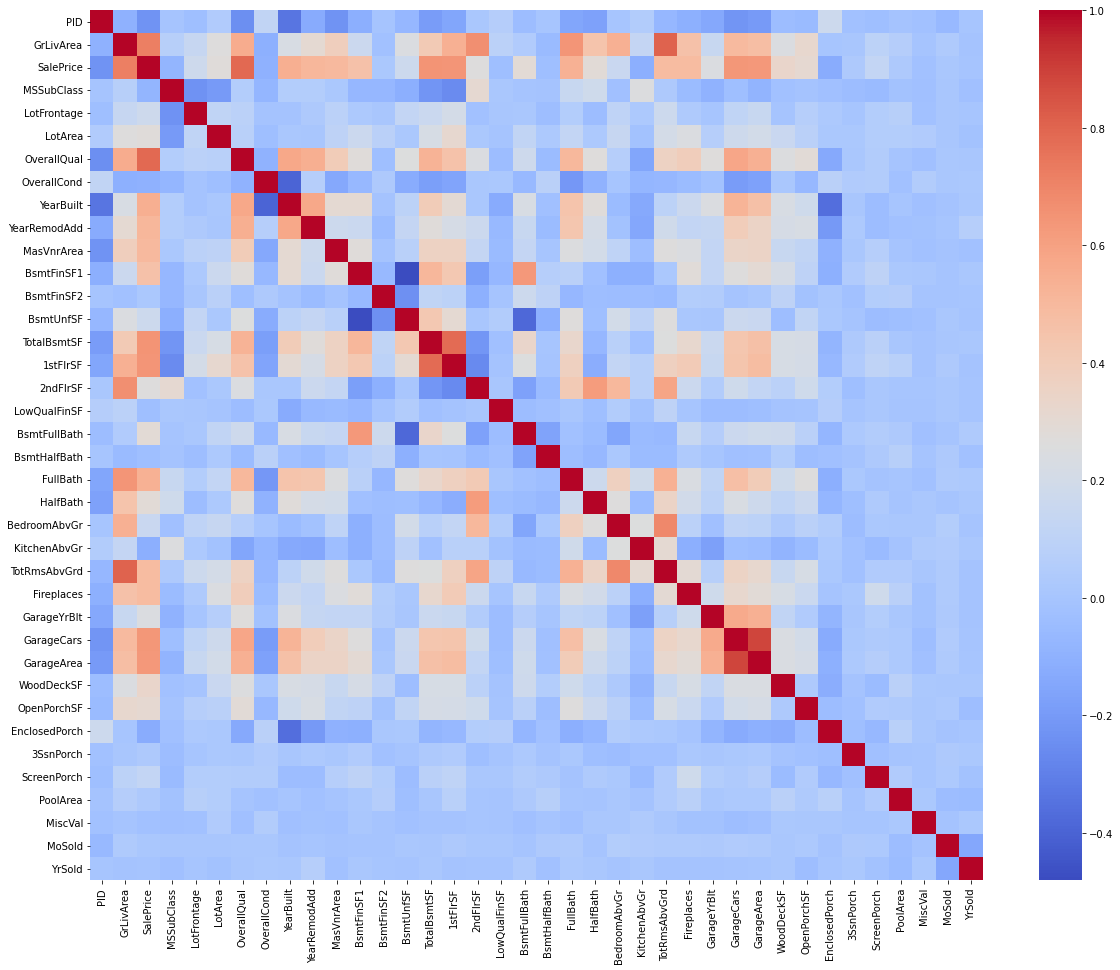

<IPython.core.display.Javascript object>

In [145]:
corr_matrix = housing_no_na.corr()

# Create a figure with a larger size
fig, ax = plt.subplots(figsize=(20, 16))

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", ax=ax)
plt.show()

In [207]:
# I still have several columns of ordinal data that needs to be converted to numeric so I'll use the
# previous function I created to do this
housing.loc[:, "Electrical"] = fill_and_replace(
    "Electrical",
    None,
    {"Mix": 0, "FuseP": 1, "FuseF": 2, "FuseA": 3, "SBrkr": 4},
    False,
)
housing.loc[:, "KitchenQual"] = fill_and_replace(
    "KitchenQual", None, {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}, False
)
housing.loc[:, "Functional"] = fill_and_replace(
    "Functional",
    None,
    {
        "Sal": 0,
        "Sev": 1,
        "Maj2": 2,
        "Maj1": 3,
        "Mod": 4,
        "Min2": 5,
        "Min1": 6,
        "Typ": 7,
    },
    False,
)
housing.loc[:, "PavedDrive"] = fill_and_replace(
    "PavedDrive", None, {"N": 0, "P": 1, "Y": 2}, False
)
housing.loc[:, "LotShape"] = fill_and_replace(
    "LotShape", None, {"IR3": 0, "IR2": 1, "IR1": 2, "Reg": 3}, False
)
housing.loc[:, "ExterQual"] = fill_and_replace(
    "ExterQual", None, {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}, False
)
housing.loc[:, "ExterCond"] = fill_and_replace(
    "ExterCond", None, {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}, False
)
housing.loc[:, "HeatingQC"] = fill_and_replace(
    "HeatingQC", None, {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}, False
)
housing.loc[:, "Utilities"] = fill_and_replace(
    "Utilities", None, {"ELO": 0, "NoSeWa": 1, "NoSewr": 2, "AllPub": 3}, False
)
housing.loc[:, "LandSlope"] = fill_and_replace(
    "LandSlope", None, {"Sev": 0, "Mod": 1, "Gtl": 2}, False
)

<IPython.core.display.Javascript object>

In [174]:
# # Most of the missing data is ordinal and can be replaced with a 0
# # the below function will replace the missing datas with a 0 and convert the rest of the data
# # to numeric
# def fill_and_replace(col, fill_na_value, map_dict, verbose=True, dataset=housing):
#     result = dataset.loc[:, col]

#     if fill_na_value is not None:
#         result = result.fillna(fill_na_value)

#     result = result.replace(map_dict)

#     if verbose:
#         print("Original value counts for {}:".format(col))
#         print(dataset.loc[:, col].value_counts(dropna=False))
#         if fill_na_value is not None:
#             print("Filled missing values with \`{}\`".format(fill_na_value))
#         else:
#             print("No fill_na_value specified, skipped fillna")
#         print("After mapping for {}:".format(col))
#         print(result.value_counts(dropna=False))
#         print("Finished fill-and-replace for column '{}'".format(col))

#     return result

<IPython.core.display.Javascript object>

In [201]:
housing_features = housing.copy()

<IPython.core.display.Javascript object>

In [211]:
# creating list of nominal variables 
nominal_cols = ['RoofMatl', 'Neighborhood', 'Condition2', 'CentralAir',
                'Street', 'MSZoning', 'LandContour', 'LotConfig',
                'SaleType', 'Foundation', 'Condition1', 'GarageType',
                'Exterior1st', 'RoofStyle', 'Exterior2nd', 'MasVnrType', 'Electrical',
                'BldgType', 'SaleCondition', 'Heating', 'HouseStyle']


<IPython.core.display.Javascript object>

In [216]:
# # creating a function to dummify nominal values
def dummify(df, features):
    '''
    Code to dummify nominal features and 
    drop highest value counts to prevent multicollinearity
    '''
    dummies = []
    for feature in features:
        # create the dummified dataframe
        value_to_drop = df[feature].value_counts().index[0]
        dummified = pd.get_dummies(df[feature], prefix=feature)
        dummified.drop(f'{feature}_{value_to_drop}', axis=1, inplace=True)
        df.drop(feature, axis=1, inplace=True)  # Drop original column here
        dummies.append(dummified)
    
    # merge the dataframes together
    for d in dummies:
        df = df.merge(d, left_index=True, right_index=True)
    
    return df


<IPython.core.display.Javascript object>

In [218]:
features = dummify(housing_features, nominal_cols)

<IPython.core.display.Javascript object>

In [219]:
features

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,GeoRefNo,Prop_Addr,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,CentralAir_N,Street_Grvl,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Electrical_1,Electrical_2,Electrical_3,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,909176150,856,126000,30,0.0,7890,3,3,2,6,6,1939,1950,0.0,2,2,3,3,1,3,238.0,1,0.0,618.0,856.0,2,856,0,0,1.0,0.0,1,0,2,1,2,4,7,1,4,1939.0,1,2.0,399.0,3,3,2,0,0,0,0,166,0,0,0,3,2010,909176150,"436 HAYWARD AVE, Ames, USA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,905476230,1049,139500,120,42.0,4235,3,3,2,5,5,1984,1984,149.0,3,2,4,3,2,6,552.0,5,393.0,104.0,1049.0,2,1049,0,0,1.0,0.0,2,0,2,1,3,5,7,0,0,1984.0,3,1.0,266.0,3,3,2,0,105,0,0,0,0,0,0,2,2009,905476230,"3416 WEST ST, Ames, USA",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

<IPython.core.display.Javascript object>

In [221]:
features = features.drop(["Prop_Addr", "GeoRefNo"], axis=1)
features["LastRemod"] = features["YrSold"] - features["YearRemodAdd"]
features["HouseAge"] = features["YrSold"] - features["YearBuilt"]
features.to_csv("./data/features_dummified.csv")
features

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,CentralAir_N,Street_Grvl,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Electrical_1,Electrical_2,Electrical_3,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LastRemod,HouseAge
0,909176150,856,126000,30,0.0,7890,3,3,2,6,6,1939,1950,0.0,2,2,3,3,1,3,238.0,1,0.0,618.0,856.0,2,856,0,0,1.0,0.0,1,0,2,1,2,4,7,1,4,1939.0,1,2.0,399.0,3,3,2,0,0,0,0,166,0,0,0,3,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,71
1,905476230,1049,139500,120,42.0,4235,3,3,2,5,5,1984,1984,149.0,3,2,4,3,2,6,552.0,5,393.0,104.0,1049.0,2,1049,0,0,1.0,0.0,2,0,2,1,3,5,7,0,0,1984.0,3,1.0,266.0,3,3,2,0,105,0,0,0,0,0,0,2,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

<IPython.core.display.Javascript object>